/tmp/ipython-input-1-3814796613.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Data preview:
 Price           Close
Ticker           AAPL
Date                 
2020-07-06  90.852005
2020-07-07  90.570099
2020-07-08  92.679497
2020-07-09  93.078049
2020-07-10  93.240860
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0574
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0064
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0053
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0055
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0043
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0042
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0040
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0039
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0037
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0028
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


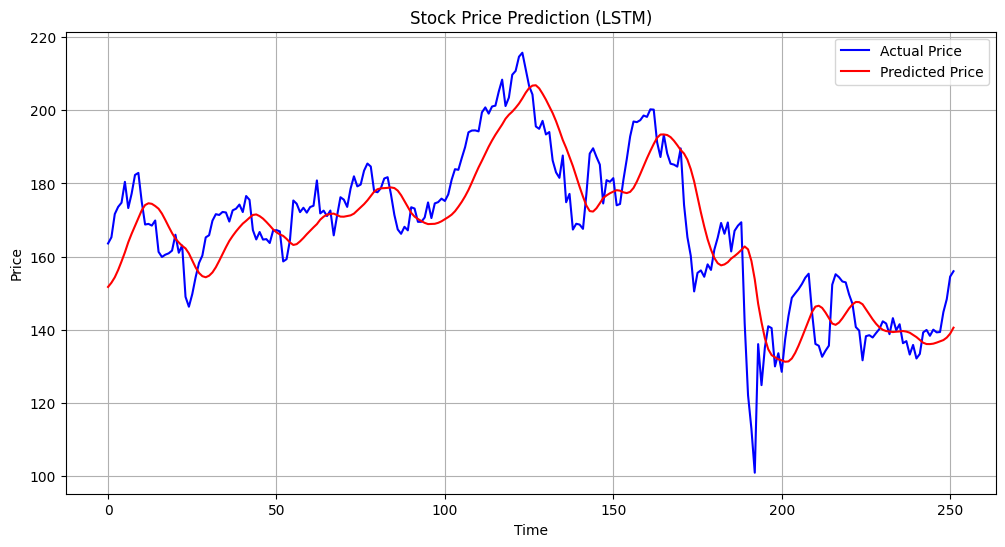

In [1]:
# STEP 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# STEP 2: Load Stock Data
def load_stock_data(ticker='AAPL', period='5y'):
    """
    Download historical stock prices from Yahoo Finance.
    ticker: stock symbol (e.g., 'AAPL' for Apple)
    period: how much history to fetch (e.g., '5y' = 5 years)
    """
    df = yf.download(ticker, period=period)
    return df[['Close']]  # we'll use only the closing price

# STEP 3: Preprocess the data
def preprocess_data(data, window_size=60):
    """
    Normalize and reshape data for LSTM input.
    window_size: number of previous time steps to use for predicting the next.
    """
    scaler = MinMaxScaler(feature_range=(0, 1))  # scale data between 0 and 1
    scaled_data = scaler.fit_transform(data)

    X = []
    y = []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i - window_size:i, 0])  # 60 time steps
        y.append(scaled_data[i, 0])  # predict the next one

    X = np.array(X)
    y = np.array(y)

    # Reshape for LSTM input: (samples, time steps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# STEP 4: Build the LSTM model
def build_lstm_model(input_shape):
    """
    Construct an LSTM model.
    input_shape: shape of the input data (time_steps, features)
    """
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))  # output layer

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# STEP 5: Plot results
def plot_predictions(actual, predicted):
    plt.figure(figsize=(12,6))
    plt.plot(actual, label='Actual Price', color='blue')
    plt.plot(predicted, label='Predicted Price', color='red')
    plt.title("Stock Price Prediction (LSTM)")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# STEP 6: Main function to run everything
def main():
    # Load data
    df = load_stock_data('AAPL', '5y')  # Apple stock, last 5 years
    print("Data preview:\n", df.head())

    # Split into training and test sets
    train_size = int(len(df) * 0.8)
    train_data = df[:train_size]
    test_data = df[train_size - 60:]  # include some overlap for context

    # Preprocess
    X_train, y_train, scaler = preprocess_data(train_data)
    X_test, y_test, _ = preprocess_data(test_data)

    # Build and train the model
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, batch_size=32, epochs=10)

    # Predict
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # undo scaling
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot
    plot_predictions(actual, predictions)

# Run the pipeline
if __name__ == "__main__":
    main()


/tmp/ipython-input-2-3635676379.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0748
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0067
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0050
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0052
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0047
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0042
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0043
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0033
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0033
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0034
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


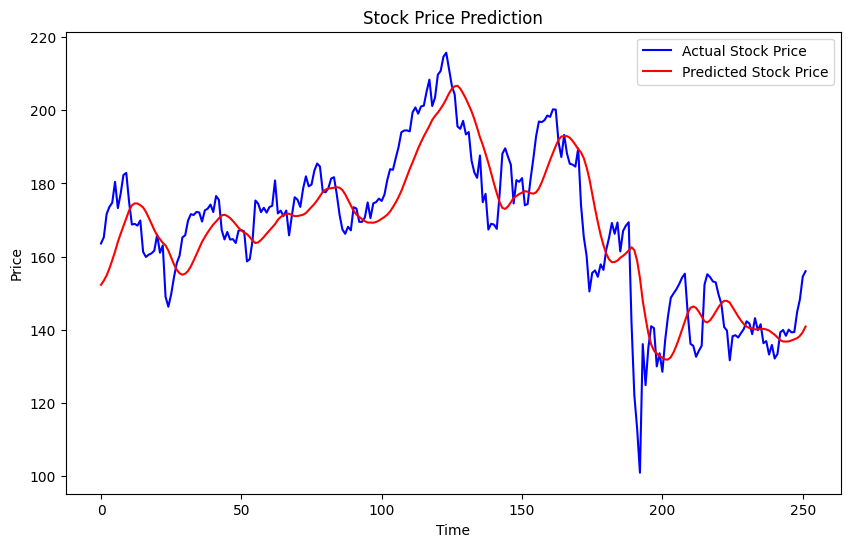

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load stock data
def load_stock_data(ticker='AAPL', period='5y'):
    data = yf.download(ticker, period=period)
    return data[['Close']]

# Preprocess data
def preprocess_data(data, window=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window, len(scaled_data)):
        X.append(scaled_data[i-window:i])
        y.append(scaled_data[i])

    X, y = np.array(X), np.array(y)
    return X, y, scaler

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Plot predictions
def plot_predictions(true, predicted):
    plt.figure(figsize=(10,6))
    plt.plot(true, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Run everything
def main():
    data = load_stock_data('AAPL', '5y')
    train_size = int(len(data) * 0.8)
    train_data = data[:train_size]
    test_data = data[train_size - 60:]

    X_train, y_train, scaler = preprocess_data(train_data)
    X_test, y_test, _ = preprocess_data(test_data)

    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    real_prices = scaler.inverse_transform(y_test)

    plot_predictions(real_prices, predictions)

if __name__ == "__main__":
    main()
